## Linear classification

In [1]:
from sklearn.datasets import make_classification

nb_samples = 500

X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)


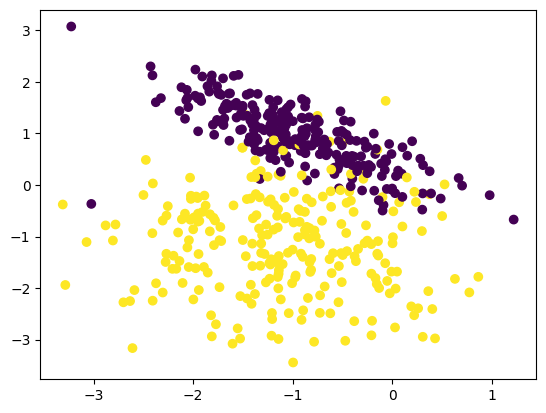

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC(kernel='linear')
print(cross_val_score(svc, X, Y, scoring='accuracy', cv=10).mean())

0.9359999999999999


In [4]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_SVC(clf):
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Superfície de Decisão')
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_title(title)
    plt.show()

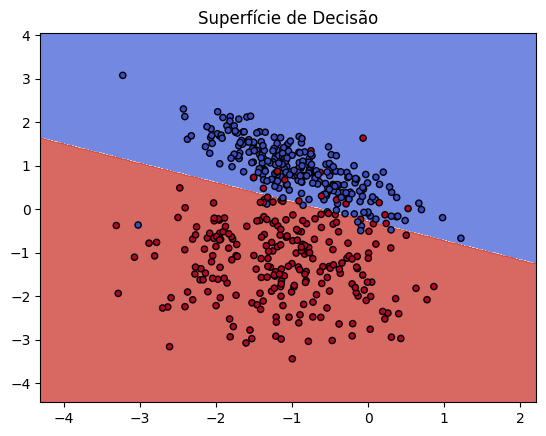

In [5]:
svc.fit(X, Y)
plot_SVC(svc)

In [6]:
import numpy as np

def custom_kernel(x1, x2):
    return np.square(np.dot(x1, x2.T) + 1)

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC(kernel=custom_kernel)
print(cross_val_score(svc, X, Y, scoring='accuracy', cv=10).mean())

0.9299999999999999


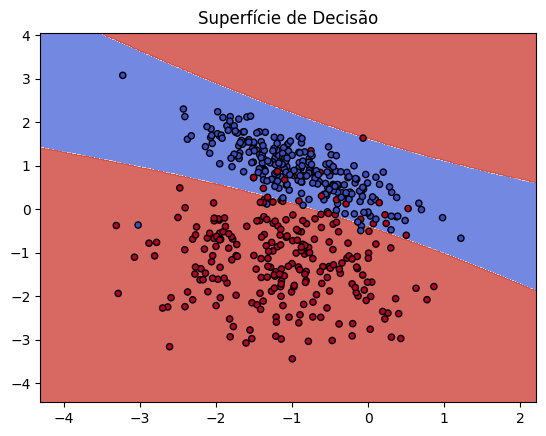

In [8]:
svc.fit(X, Y)
plot_SVC(svc)

## Non-linear examples

In [15]:
from sklearn.datasets import make_circles 
 
nb_samples = 500 
X, Y = make_circles(n_samples=nb_samples, noise=0.1)

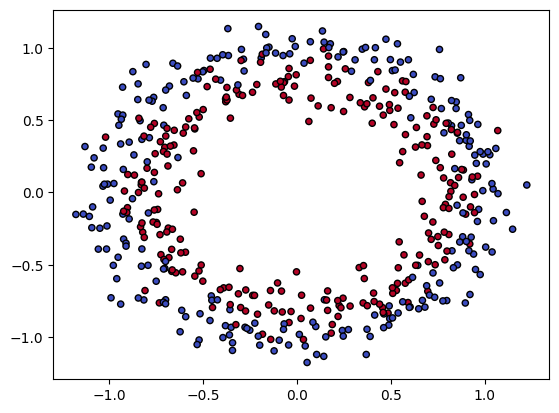

In [16]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression 
 
lr = LogisticRegression() 
lr.fit(X, Y)
print(cross_val_score(lr, X, Y, scoring='accuracy', cv=10).mean()) 

0.402


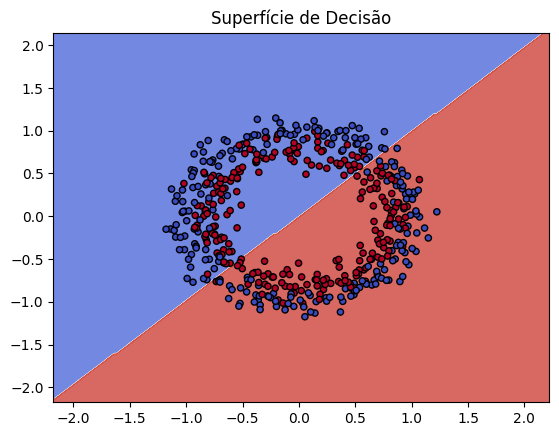

In [18]:
plot_SVC(lr)

In [19]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV 
 
param_grid = [ 
    {  
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
        'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ] 
    } 
] 
 
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid, 
                  scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count()) 
 
gs.fit(X, Y) 
 
print(gs.best_estimator_.get_params())  
print(gs.best_score_) 


{'C': 0.4, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
0.8400000000000001


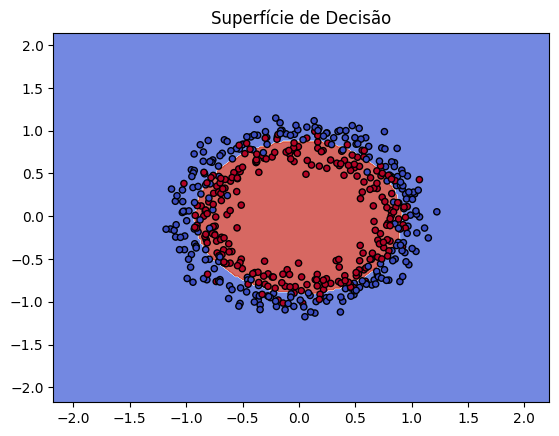

In [20]:
plot_SVC(gs.best_estimator_)

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC(kernel='poly')
print(cross_val_score(svc, X, Y, scoring='accuracy', cv=10).mean())

0.514


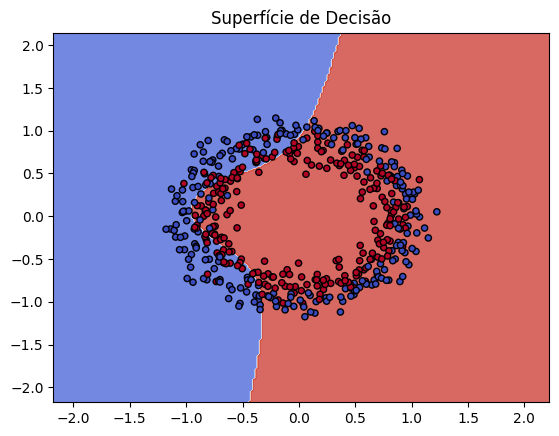

In [22]:
svc.fit(X, Y)
plot_SVC(svc)

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC(kernel='sigmoid')
print(cross_val_score(svc, X, Y, scoring='accuracy', cv=10).mean())

0.508


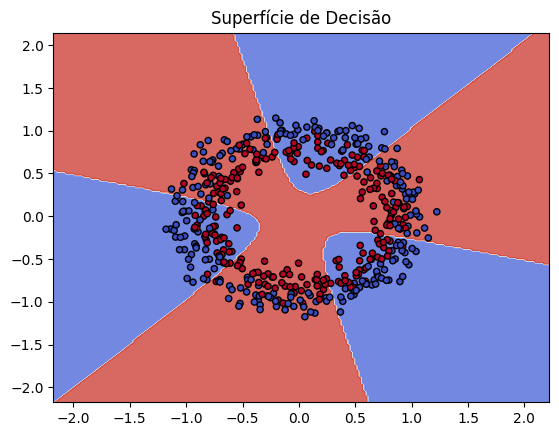

In [24]:
svc.fit(X, Y)
plot_SVC(svc)

### MNIST DATABASE

In [25]:
from sklearn.datasets import load_digits 
 
digits = load_digits() 
 
param_grid = [ 
    {  
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
        'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] 
    } 
] 
 
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid, 
                  scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count()) 
 
gs.fit(digits.data, digits.target) 
 
print(gs.best_estimator_.get_params())  
print(gs.best_score_) 

{'C': 4.5, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
0.9821818746120423


### Olivetti Faces Database

In [26]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(data_home='/ML/faces/')

In [32]:

len(faces.data)

4096

In [28]:
param_grid = [
 { 
   'kernel': ['rbf', 'poly'],
   'C': [ 0.1, 0.5, 1.0, 1.5 ],
   'degree': [2, 3, 4, 5],
   'gamma': [0.001, 0.01, 0.1, 0.5]
 }
]

gs = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=8,  n_jobs=multiprocessing.cpu_count())

gs.fit(faces.data, faces.target)
print(gs.best_estimator_.get_params())
print(gs.best_score_)

{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 0.01, 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
0.965


## ν-Support Vector Machines

In [56]:
from sklearn.datasets import make_classification

nb_samples = 500

X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

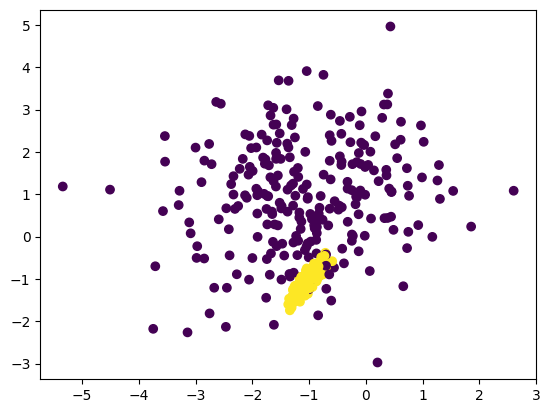

In [57]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

In [60]:
svc = SVC(kernel='linear') 
svc.fit(X, Y)

print(svc.support_vectors_.shape)
print(cross_val_score(svc, X, Y, scoring='accuracy', cv=10).mean()) 

(120, 2)
0.9260000000000002


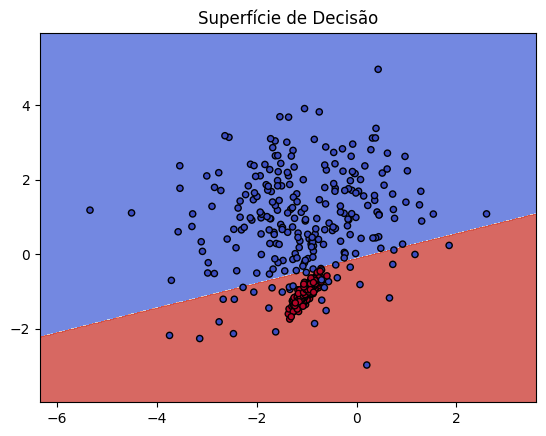

In [61]:
plot_SVC(svc)

In [50]:
from sklearn.svm import NuSVC 
 
nusvc = NuSVC(kernel='linear', nu=0.5) 
nusvc.fit(X, Y) 

print(nusvc.support_vectors_.shape) 
print(cross_val_score(nusvc, X, Y, scoring='accuracy', cv=10).mean()) 

(250, 2)
0.982


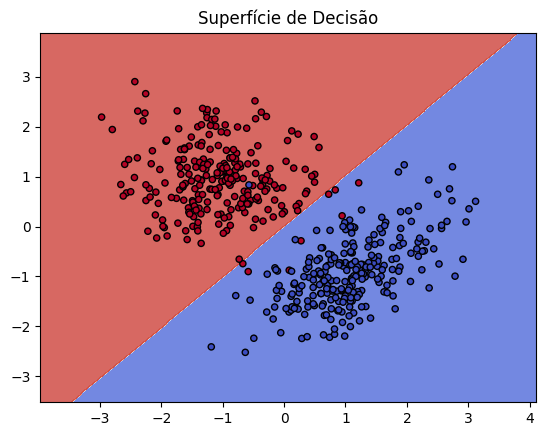

In [51]:
plot_SVC(nusvc)

In [52]:
nusvc = NuSVC(kernel='linear', nu=0.15) 
nusvc.fit(X, Y) 

print(nusvc.support_vectors_.shape) 
print(cross_val_score(nusvc, X, Y, scoring='accuracy', cv=10).mean()) 

(76, 2)
0.9879999999999999


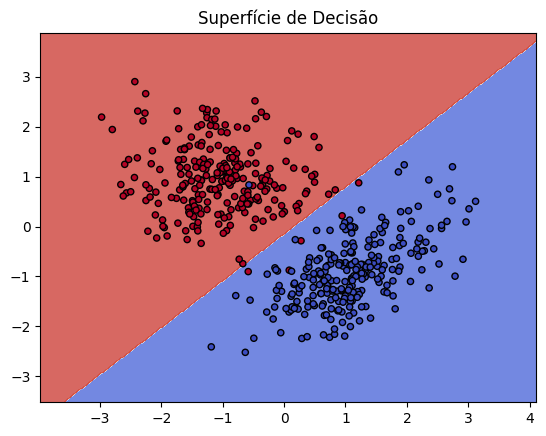

In [53]:
plot_SVC(nusvc)

In [58]:
import numpy as np 
 
param_grid = [ 
    {  
        'nu': np.arange(0.05, 1.0, 0.05) 
    } 
] 
 
gs = GridSearchCV(estimator=NuSVC(kernel='linear'), param_grid=param_grid, 
                  scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count()) 
gs.fit(X, Y)  

print(gs.best_estimator_) 
print(gs.best_estimator_.support_vectors_.shape) 
print(gs.best_score_) 

NuSVC(kernel='linear', nu=0.25)
(126, 2)
0.9280000000000002


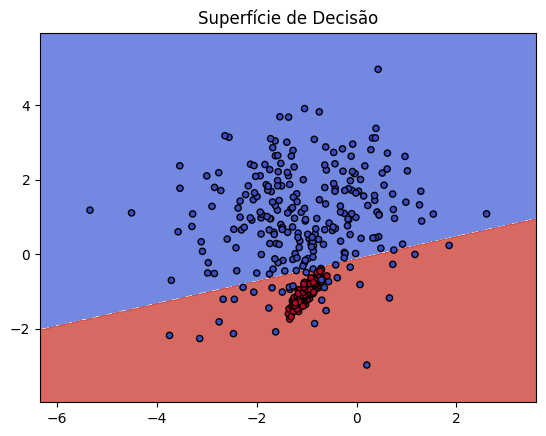

In [59]:
plot_SVC(gs.best_estimator_)

## Support Vector Regression 

In [62]:
import numpy as np

nb_samples = 50 
 
X = np.arange(-nb_samples, nb_samples, 1) 
Y = np.zeros(shape=(2 * nb_samples,)) 
 
for x in X: 
    Y[int(x)+nb_samples] = np.power(x*6, 2.0) / 1e4 + np.random.uniform(-2, 2)


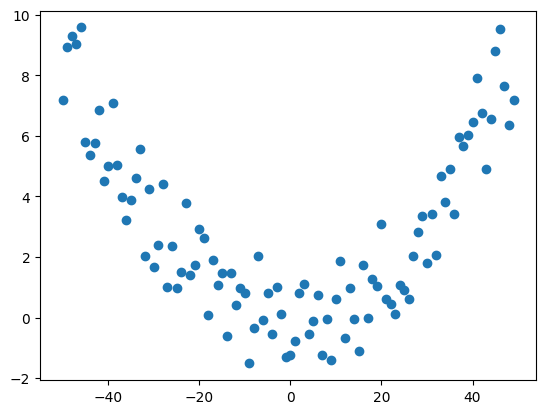

In [63]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.show()

In [64]:
from sklearn.svm import SVR 
 
svr = SVR(kernel='poly', degree=2, C=1.5, epsilon=0.5) 

print(cross_val_score(svr, X.reshape((nb_samples*2, 1)), Y, scoring='neg_mean_squared_error', cv=10).mean()) 

-1.265443273515729


In [65]:
svr.fit(X.reshape(-1, 1), Y.ravel())
Y_pred = svr.predict(X.reshape(-1, 1))

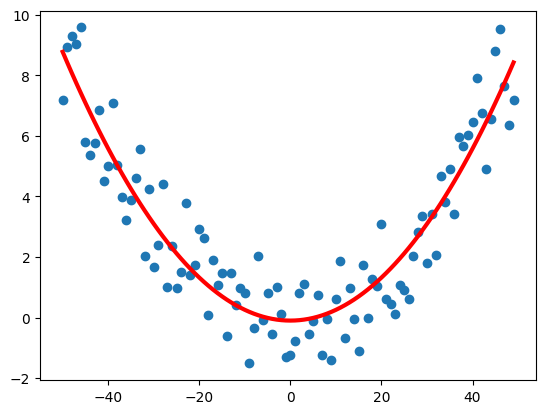

In [66]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.plot(X, Y_pred, color="red", linewidth=3)
plt.show()

## An example of SVR with the Airfoil Self-Noise dataset

In [67]:
import pandas as pd

file_path = 'dataset\\airfoil_self_noise.dat'

df = pd.read_csv(file_path, sep='\t', header=None)

In [68]:
print(df.describe())

                  0            1            2            3            4  \
count   1503.000000  1503.000000  1503.000000  1503.000000  1503.000000   
mean    2886.380572     6.782302     0.136548    50.860745     0.011140   
std     3152.573137     5.918128     0.093541    15.572784     0.013150   
min      200.000000     0.000000     0.025400    31.700000     0.000401   
25%      800.000000     2.000000     0.050800    39.600000     0.002535   
50%     1600.000000     5.400000     0.101600    39.600000     0.004957   
75%     4000.000000     9.900000     0.228600    71.300000     0.015576   
max    20000.000000    22.200000     0.304800    71.300000     0.058411   

                 5  
count  1503.000000  
mean    124.835943  
std       6.898657  
min     103.380000  
25%     120.191000  
50%     125.721000  
75%     129.995500  
max     140.987000  


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, 0:5].values
Y = df.iloc[:, 5].values

ssx, ssy = StandardScaler(), StandardScaler()

Xs = ssx.fit_transform(X)
Ys = ssy.fit_transform(Y.reshape(-1, 1))

X_train, X_test, Y_train, Y_test = train_test_split(Xs, Ys.ravel(), test_size=300, random_state=1000)

svr = SVR(kernel='rbf', gamma=0.75, C=2.8, cache_size=500, epsilon=0.1)

svr.fit(X_train, Y_train)
Y_pred = svr.predict(Xs)

print(svr)

SVR(C=2.8, cache_size=500, gamma=0.75)


In [70]:
print(svr.score(X_train, Y_train))
print(svr.score(X_test, Y_test))

0.8968149749325032
0.8718971958275201


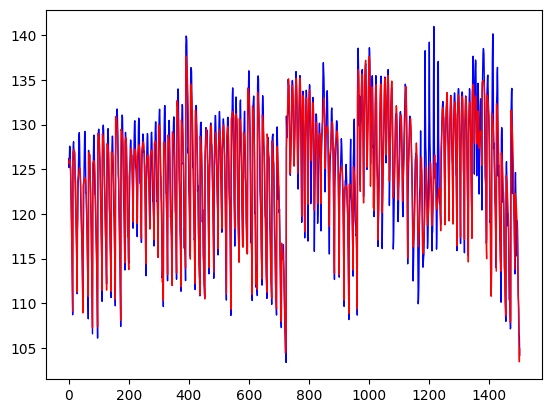

In [71]:
import matplotlib.pyplot as plt

plt.plot(ssy.inverse_transform(Ys), color="blue", linewidth=1)
plt.plot(ssy.inverse_transform(Y_pred.reshape(-1,1)), color="red", linewidth=1)

#plt.plot(Ys, color="blue", linewidth=1)
#plt.plot(Y_pred.reshape(-1,1), color="red", linewidth=1)

plt.show()

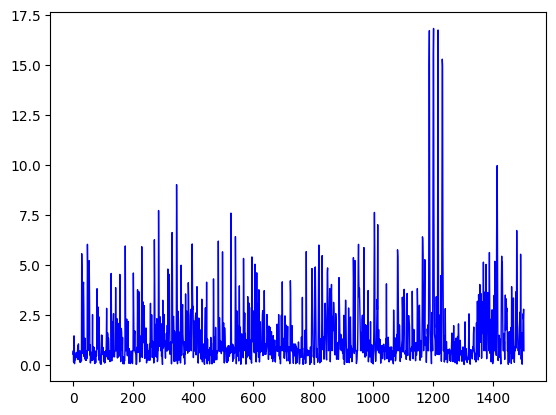

In [72]:
import matplotlib.pyplot as plt

plt.plot(abs(ssy.inverse_transform(Ys)-ssy.inverse_transform(Y_pred.reshape(-1,1))), color="blue", linewidth=1)

plt.show()